In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import random as ran
from IPython.display import clear_output
from src import spotify, dp, utils, DB
from sklearn.metrics.pairwise import euclidean_distances as euc
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt

db = DB()

In [3]:
ms = utils.MatchingSystem()

In [16]:
ms.seed_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7tIOwGFRTM08JdAeKOELGp,0.632,0.0378,5,-20.596,0.0583,0.9890,0.935000,0.1120,0.357,121.361
1,3UPjb91Fwm7u2tAm92Bk0p,0.554,0.5260,7,-5.210,0.0394,0.8080,0.000000,0.0740,0.230,129.845
2,3dbLT62Cvs46Ju7a8gpr36,0.727,0.8790,9,-1.167,0.1290,0.1240,0.000012,0.2440,0.671,146.959
3,2FWquqPNxte8iqZ3ATQG0p,0.403,0.7240,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
4,3gzIK2dGSVvPBiohsTwEWZ,0.639,0.5690,0,-7.236,0.0487,0.0581,0.000169,0.1080,0.616,142.967


# K Checking
- 새로운 K의 갯수를 만들 수 있는지 확인하는 과정

In [4]:
ms.check()

현재 seed 음악 갯수 : 366
K 갯수 : 14 (후에 체크 방식으로 진행)


# KMeans Run

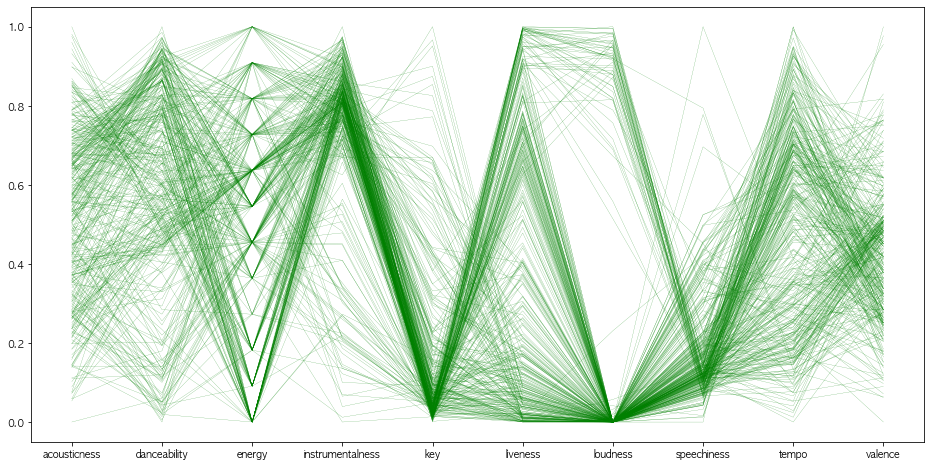

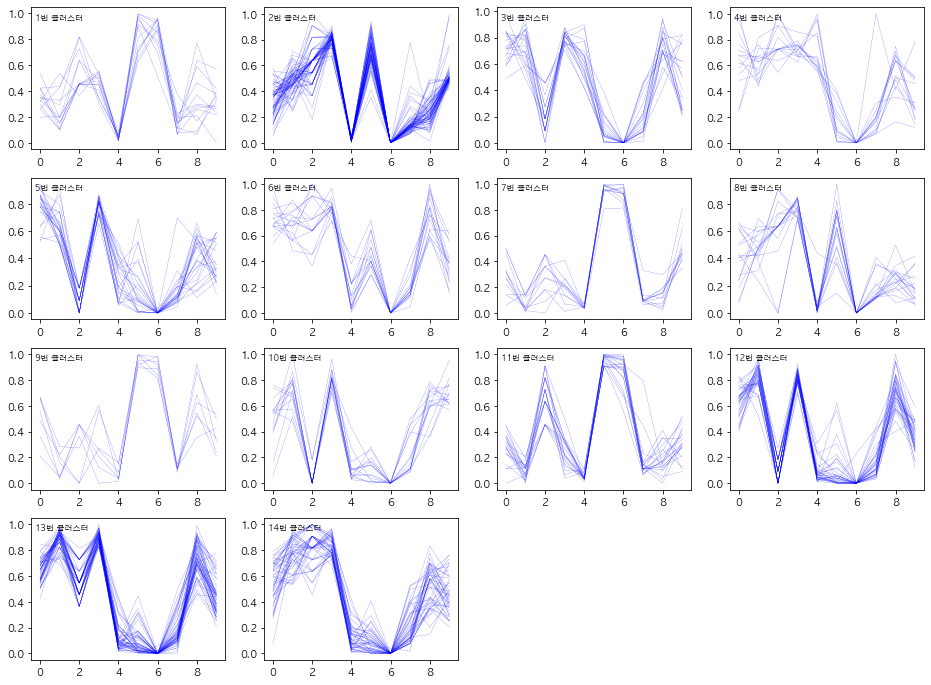

In [17]:
ms.kmeans_run()

clear_output(wait=True)

seed_features = ms.seed_features
norm_features = ms.norm_features
kmeans = ms.kmeans

utils.visual_norm_data(None, norm_features)
utils.visual_cluster_data(norm_features, kmeans)

In [19]:
kmeans.sorting_ver_2()

[ 5. 12. 11.  9.  4.  2.  8.  6. 10.  0.  1.  7.  3. 13.]
sorting okay


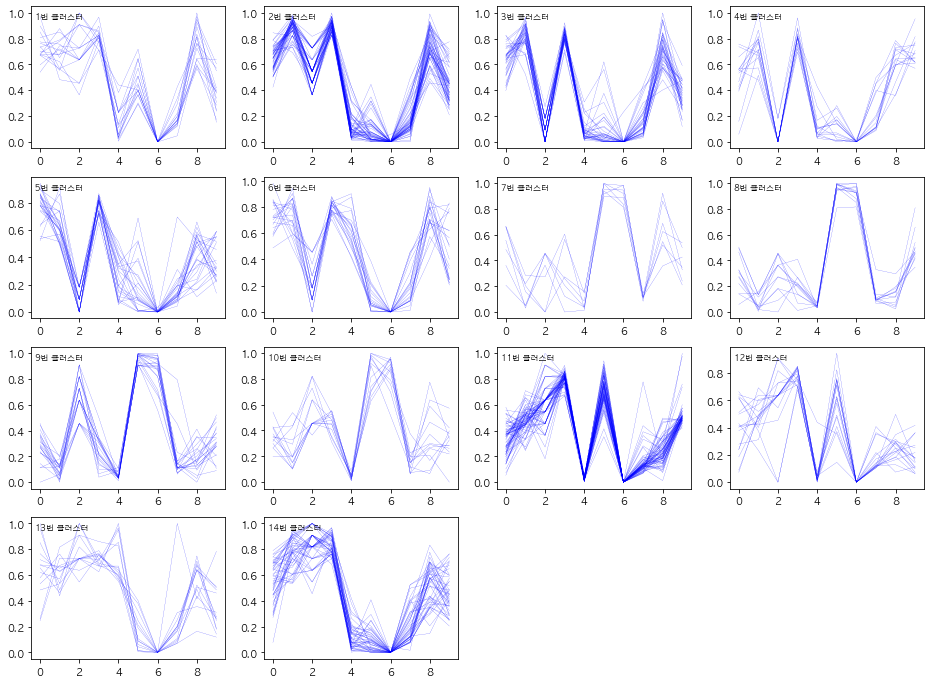

In [20]:
utils.visual_cluster_data(norm_features, kmeans)

# Mail Box Matching

In [21]:
ms.box_matching()

ms.mail_box_radar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
623f2515ff1c441a392ab38c,0,0,0,0,0,0,80,0,20,0,0,0,0,0
623f2515ff1c441a392ab38d,0,94,0,0,0,0,0,0,0,0,0,0,0,6
623f2515ff1c441a392ab38e,10,50,0,0,0,0,0,0,5,0,35,0,0,0
623f2515ff1c441a392ab38f,0,83,0,0,0,0,0,0,0,0,0,0,11,6
623f2515ff1c441a392ab390,0,0,14,71,0,0,0,0,0,0,0,0,0,14


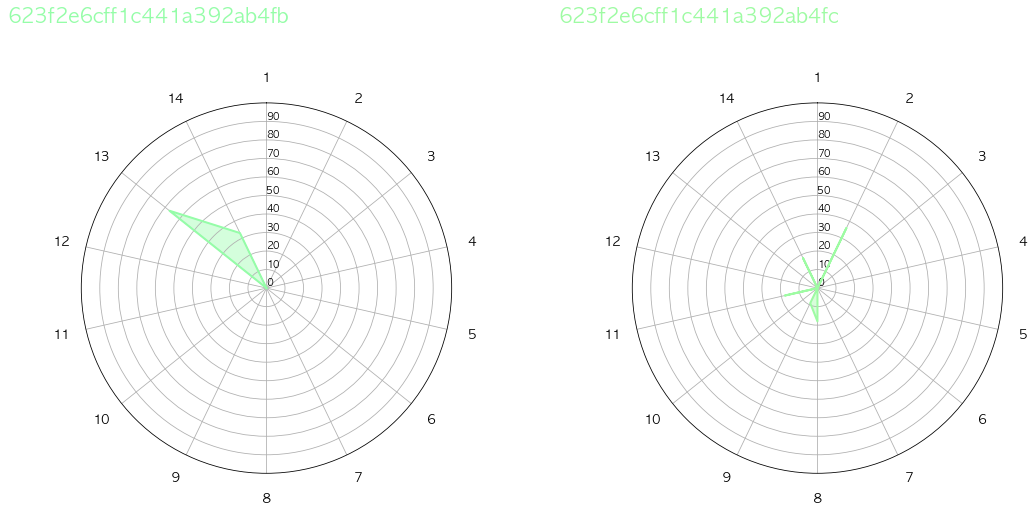

계속 진행하시려면 next, 종료는 아무거나 입력해주세요.exit


In [32]:
ms.visual_radar_step()

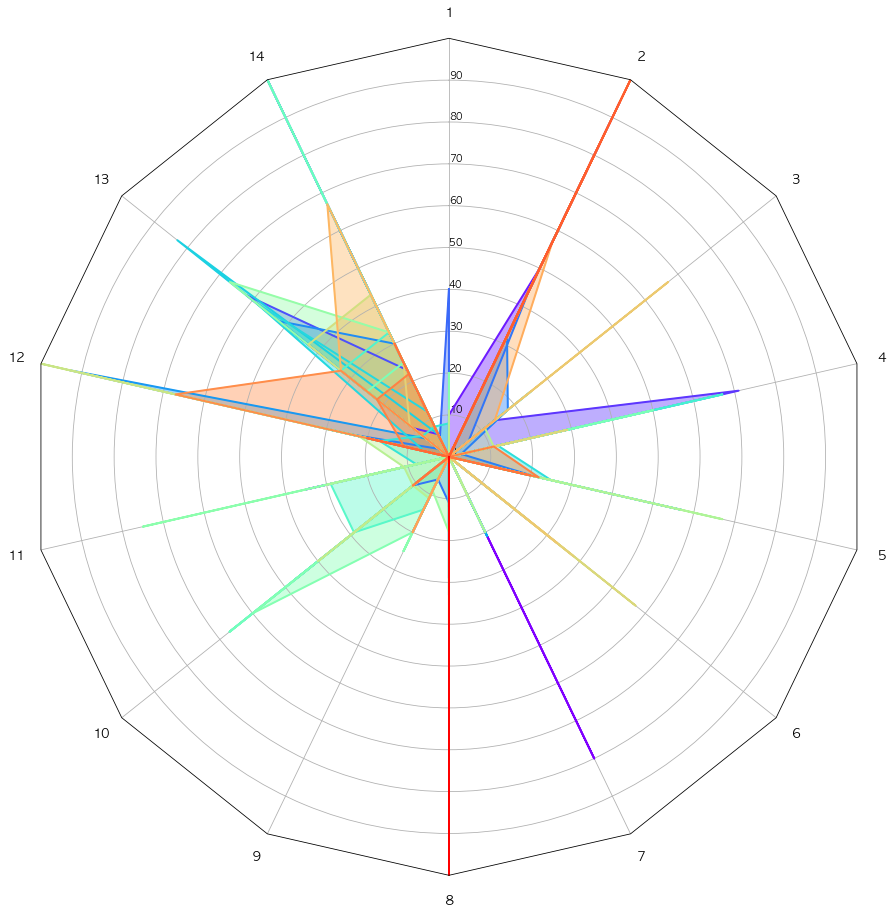

In [33]:
ms.visual_radar()

Mail Box Points Save Success.


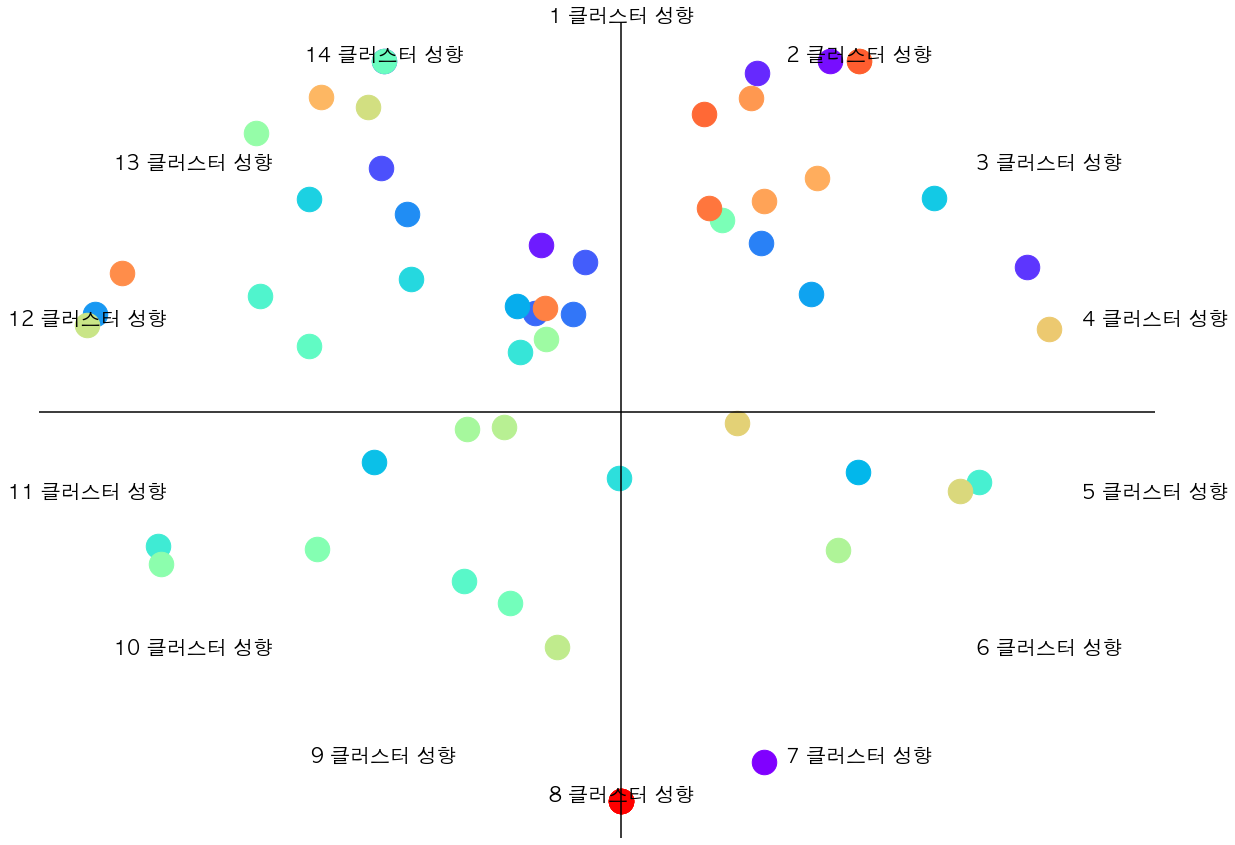

,x,y
623f2515ff1c441a392ab38c,26.033024,-90.096887
623f2515ff1c441a392ab38d,38.181769,90.096887
623f2515ff1c441a392ab38e,-14.597709,42.755366
623f2515ff1c441a392ab38f,24.808902,87.044617
623f2515ff1c441a392ab390,74.091150,37.141408


In [34]:
ms.make_coord()
ms.visual_coord()

ms.mail_box_points.head()

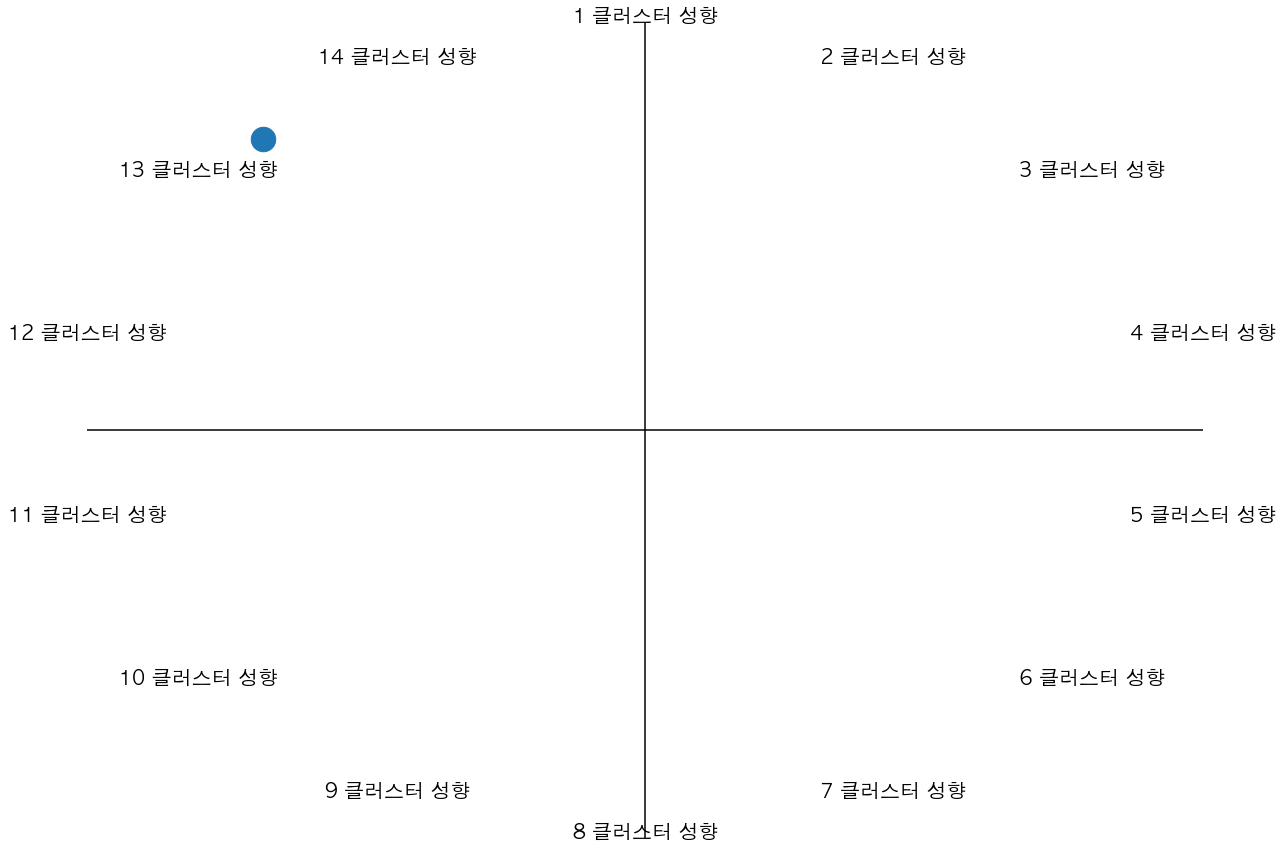

In [35]:
ms.visual_coord(_id="623f2e6cff1c441a392ab4fb")

In [27]:
ms.mail_box_coord

array([[  26.03302435,  -90.09688679],
       [  38.18176904,   90.09688679],
       [ -14.59770867,   42.75536637],
       [  24.8089016 ,   87.04461706],
       [  74.09115017,   37.14140769],
       [ -43.38837391,   90.09688679],
       [ -43.82895923,   62.71646569],
       [  -6.5344661 ,   38.50855075],
       [ -15.72173304,   25.37286231],
       [  -8.86998939,   25.01482852],
       [  25.61175189,   43.25941522],
       [ -39.01949329,   50.76575151],
       [ -96.14111621,   25.05887547],
       [  34.59305469,   30.21965408],
       [ -19.09612652,   27.0181809 ],
       [  43.27357523,  -15.49047531],
       [ -45.09645497,  -12.96322277],
       [  57.1235571 ,   54.75821876],
       [ -56.95475911,   54.74965355],
       [ -38.42027423,   33.96889508],
       [  -0.37919413,  -16.99813957],
       [ -18.45808617,   15.26138111],
       [ -84.55533043,  -34.4306259 ],
       [  65.32017012,  -18.09109742],
       [ -65.91904123,   29.73197264],
       [ -28.74748534,  -

# 유사도 확인

In [36]:
norm_features = ms.norm_features
mail_box_points = ms.mail_box_points
mail_box_col = ms.mail_box

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7tIOwGFRTM08JdAeKOELGp,0.557221,0.030677,0.454545,0.259920,0.083760,0.993969,0.981112,0.119325,0.357399,0.426436
1,3UPjb91Fwm7u2tAm92Bk0p,0.450954,0.529227,0.636364,0.820022,0.035348,0.812049,0.000000,0.072191,0.219311,0.482922
2,3dbLT62Cvs46Ju7a8gpr36,0.686649,0.889710,0.818182,0.967201,0.264857,0.124570,0.000012,0.283056,0.698815,0.596867
3,2FWquqPNxte8iqZ3ATQG0p,0.245232,0.731424,0.727273,0.788933,0.564549,0.378857,0.000000,0.095386,0.434598,0.265127
4,3gzIK2dGSVvPBiohsTwEWZ,0.566757,0.573138,0.000000,0.746269,0.059170,0.058335,0.000177,0.114364,0.639013,0.570288


### 반경 내 유사도 측정

In [768]:
from bson import ObjectId

In [769]:
# query 예시

# 반경 50 내의 데이터만을 가지고 유사도 측정
rate =50
evaluate_pd_1 = pd.DataFrame()
for box_id in ms.mail_box_points.index.values:
    x, y = ms.mail_box_points.loc[box_id].values

    min_x = x - rate
    max_x = x + rate

    min_y = y - rate
    max_y = y + rate

    res = mail_box_col.find({
        "$and": [
            {"$and": [
                {"coord.x": { "$gte": min_x }},
                {"coord.x": { "$lte": max_x }},    
            ]},
            {"$and": [
                {"coord.y": { "$gte": min_y }},
                {"coord.y": { "$lte": max_y }},
            ]}
        ]
    })

    track_info = pd.DataFrame()
    for _ in res:
        _id = str(_["_id"])
        track_list = _['tracks']

        _track_info = pd.DataFrame(track_list)
        _track_info['box_id'] = _id
        track_info = pd.concat([track_info, _track_info],ignore_index=True)

    track_info.head()

    my_track = track_info[track_info['box_id'] == box_id]['track_id']
    reco_track = track_info[track_info['box_id'] != box_id]['track_id']

    my_track.name = 'id'
    reco_track.name = 'id'

    my_track = pd.merge(my_track, norm_features, how='inner', on='id')
    reco_track = pd.merge(reco_track, norm_features, how='inner', on='id')

    euc_mean = euc(my_track.values[:,1:], reco_track.values[:, 1:]).mean()
    evaluate_pd_1 = evaluate_pd_1.append(pd.Series({
        "평균 거리": euc_mean
    }, name=box_id))
    
print("반경 내 테스트 : {}".format(evaluate_pd_1['평균 거리'].mean()))

반경 내 테스트 : 0.8332283558864951


### 반경 외 유사도 측정

In [770]:
# query 예시

# 반경 100 외의 데이터만을 가지고 유사도 측정
rate = 80
evaluate_pd_2 = pd.DataFrame()
for box_id in ms.mail_box_points.index.values:
    x, y = ms.mail_box_points.loc[box_id].values

    min_x = x - rate
    max_x = x + rate

    min_y = y - rate
    max_y = y + rate

    res = mail_box_col.find({
        "$or": [
            {"_id": ObjectId(box_id)},
            {"coord.x": { "$lte": min_x }},
            {"coord.x": { "$gte": max_x }},    
            {"coord.y": { "$lte": min_y }},
            {"coord.y": { "glte": max_y }},
        ]
    })

    track_info = pd.DataFrame()
    for _ in res:
        _id = str(_["_id"])
        track_list = _['tracks']

        _track_info = pd.DataFrame(track_list)
        _track_info['box_id'] = _id
        track_info = pd.concat([track_info, _track_info],ignore_index=True)

    track_info.head()

    my_track = track_info[track_info['box_id'] == box_id]['track_id']
    reco_track = track_info[track_info['box_id'] != box_id]['track_id']

    my_track.name = 'id'
    reco_track.name = 'id'

    my_track = pd.merge(my_track, norm_features, how='inner', on='id')
    reco_track = pd.merge(reco_track, norm_features, how='inner', on='id')

    euc_mean = euc(my_track.values[:,1:], reco_track.values[:, 1:]).mean()
    evaluate_pd_2 = evaluate_pd_2.append(pd.Series({
        "평균 거리": euc_mean
    }, name=box_id))
    
print("반경 외 테스트 : {}".format(evaluate_pd_2['평균 거리'].mean()))

반경 외 테스트 : 1.1129371915911324


In [771]:
evaluate_pd = pd.DataFrame(columns=['반경 내 테스트', '반경 외 테스트'])

evaluate_pd['반경 내 테스트'] = evaluate_pd_1['평균 거리']
evaluate_pd['반경 외 테스트'] = evaluate_pd_2['평균 거리']
evaluate_pd['오차'] = evaluate_pd['반경 내 테스트'] - evaluate_pd['반경 외 테스트']

print("반경 내, 반경 외 평균 오차는 {} 입니다.".format(evaluate_pd['오차'].mean()))

evaluate_pd.head()

반경 내, 반경 외 평균 오차는 -0.2797088357046374 입니다.


,반경 내 테스트,반경 외 테스트,오차
623f2515ff1c441a392ab38c,1.267466,1.800495,-0.533029
623f2515ff1c441a392ab38d,0.764148,0.977654,-0.213507
623f2515ff1c441a392ab38e,0.974180,1.375004,-0.400824
623f2515ff1c441a392ab38f,0.785080,1.008964,-0.223884
623f2515ff1c441a392ab390,1.247038,1.070916,0.176122


In [772]:
err_datas = ms.mail_box_points.loc[evaluate_pd[evaluate_pd['오차'] > 0].index].copy()
err_datas.head()

,x,y
623f2515ff1c441a392ab390,-20.147117,-70.133670
623f2516ff1c441a392ab395,-30.269832,-19.601587
623f2abbff1c441a392ab4c4,-16.488109,-36.807985
623f2abbff1c441a392ab4c6,-43.192617,-46.306965
623f2abbff1c441a392ab4c8,11.619926,-38.973940


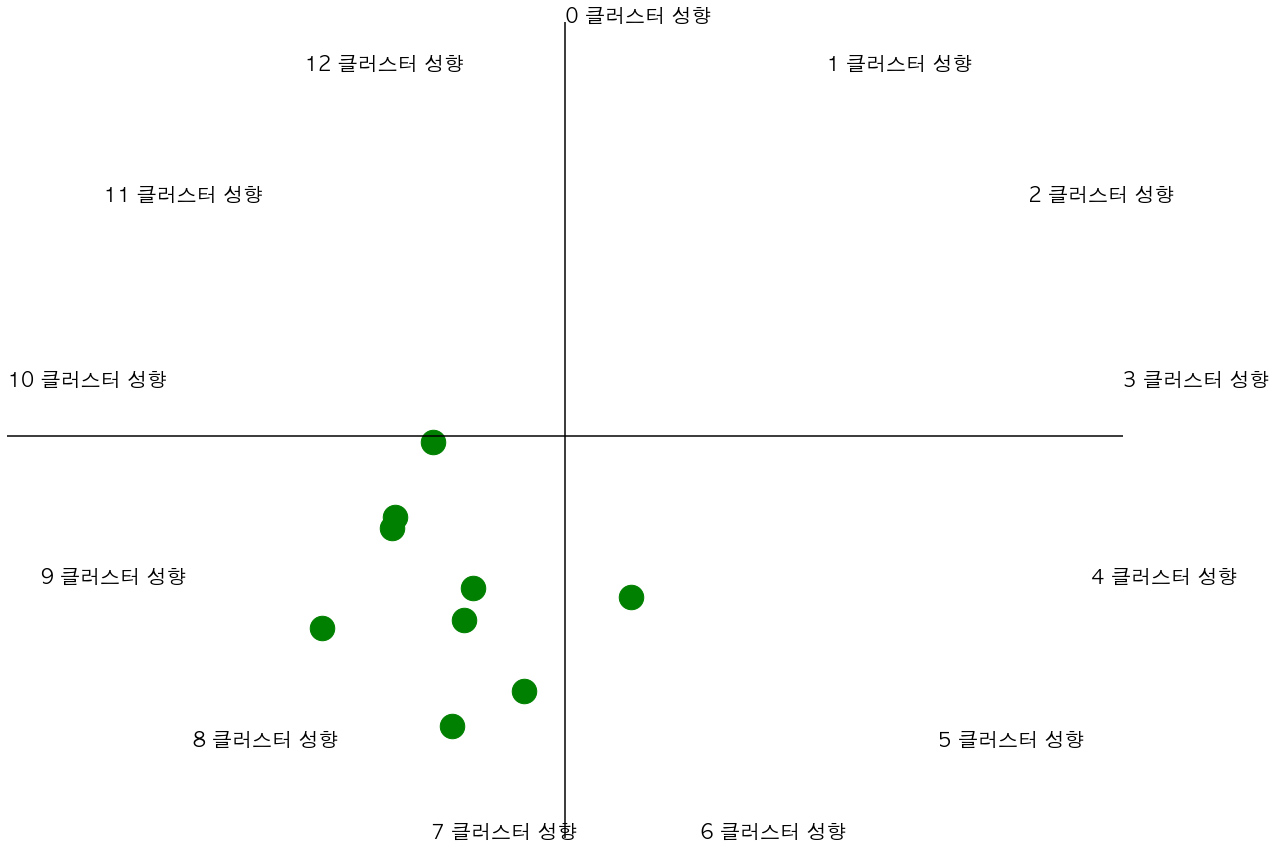

In [773]:
plt.figure(figsize=(20, 15))

for idx, pt in enumerate(err_datas.values):
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=600, color='g', label=ms.mail_box_radar.index[idx])
    
for idx, pt in enumerate(ms.max_coord):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    ms.max_coord[:,0].min(),
    ms.max_coord[:,0].max()
])
plt.yticks([
    ms.max_coord[:,1].min(),
    ms.max_coord[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

### 오차 제거 반경 내 데이터 성능 평가

In [774]:
# query 예시

# 반경 내의 데이터만을 가지고 유사도 측정
rate = 50
evaluate_pd_1 = pd.DataFrame()
for box_id in ms.mail_box_points.index.values:
    if box_id in err_datas.index.values:
        continue
    
    x, y = ms.mail_box_points.loc[box_id].values

    min_x = x - rate
    max_x = x + rate

    min_y = y - rate
    max_y = y + rate

    res = mail_box_col.find({
        "$and": [
            {"$and": [
                {"coord.x": { "$gte": min_x }},
                {"coord.x": { "$lte": max_x }},    
            ]},
            {"$and": [
                {"coord.y": { "$gte": min_y }},
                {"coord.y": { "$lte": max_y }},
            ]}
        ]
    })

    track_info = pd.DataFrame()
    for _ in res:
        _id = str(_["_id"])
        track_list = _['tracks']

        _track_info = pd.DataFrame(track_list)
        _track_info['box_id'] = _id
        track_info = pd.concat([track_info, _track_info],ignore_index=True)

    track_info.head()

    my_track = track_info[track_info['box_id'] == box_id]['track_id']
    reco_track = track_info[track_info['box_id'] != box_id]['track_id']

    my_track.name = 'id'
    reco_track.name = 'id'

    my_track = pd.merge(my_track, norm_features, how='inner', on='id')
    reco_track = pd.merge(reco_track, norm_features, how='inner', on='id')

    euc_mean = euc(my_track.values[:,1:], reco_track.values[:, 1:]).mean()
    evaluate_pd_1 = evaluate_pd_1.append(pd.Series({
        "평균 거리": euc_mean
    }, name=box_id))
    
print("반경 내 테스트 : {}".format(evaluate_pd_1['평균 거리'].mean()))

반경 내 테스트 : 0.7769598354391737


In [775]:
evaluate_pd = pd.DataFrame(columns=['반경 내 테스트', '반경 외 테스트'])

evaluate_pd['반경 내 테스트'] = evaluate_pd_1['평균 거리']
evaluate_pd['반경 외 테스트'] = evaluate_pd_2['평균 거리']
evaluate_pd['오차'] = evaluate_pd['반경 내 테스트'] - evaluate_pd['반경 외 테스트']

print("반경 내, 반경 외 평균 오차는 {} 입니다.".format(evaluate_pd['오차'].mean()))

evaluate_pd.head()

반경 내, 반경 외 평균 오차는 -0.35151931792989827 입니다.


,반경 내 테스트,반경 외 테스트,오차
623f2515ff1c441a392ab38c,1.267466,1.800495,-0.533029
623f2515ff1c441a392ab38d,0.764148,0.977654,-0.213507
623f2515ff1c441a392ab38e,0.974180,1.375004,-0.400824
623f2515ff1c441a392ab38f,0.785080,1.008964,-0.223884
623f2515ff1c441a392ab391,0.538877,1.110528,-0.571651


In [776]:
check_type = "idx" # or id

check_idx = evaluate_pd['오차'].abs().argmax()
check_id = "623f2746ff1c441a392ab410"

rate_x = 50
rate_y = 50

if check_type != "idx":
    _my_box_id = ms.mail_box_points.loc[check_id].name
    user_centroid = ms.mail_box_points.loc[check_id].values
else:
    _my_box_id = ms.mail_box_points.iloc[check_idx].name
    user_centroid = ms.mail_box_points.iloc[check_idx].values
    
user_x, user_y = user_centroid

print(_my_box_id)
print("user x: {}, user y: {}".format(user_x, user_y))

search_box = ms.mail_box_points[
    ((ms.mail_box_points['x'] < (user_x + rate_x)) & (ms.mail_box_points['x'] > (user_x - rate_x))) &
    ((ms.mail_box_points['y'] < (user_y + rate_y)) & (ms.mail_box_points['y'] > (user_y - rate_y)))
]

search_box

623f2746ff1c441a392ab413
user x: 28.15004926982286, user y: 80.44413306105031


,x,y
623f2516ff1c441a392ab392,-1.585622e+01,78.963443
623f2745ff1c441a392ab40b,-7.917212e-02,74.101186
623f2746ff1c441a392ab412,2.906178e+01,78.908291
623f2746ff1c441a392ab413,2.815005e+01,80.444133
623f2abbff1c441a392ab4c7,-9.253405e+00,34.624699
623f2e6cff1c441a392ab4fb,7.105427e-15,91.440098
623f2e6dff1c441a392ab502,-2.086877e+01,82.762123
6241924d2aaa4bb999f6d5ca,7.827002e+00,49.136777


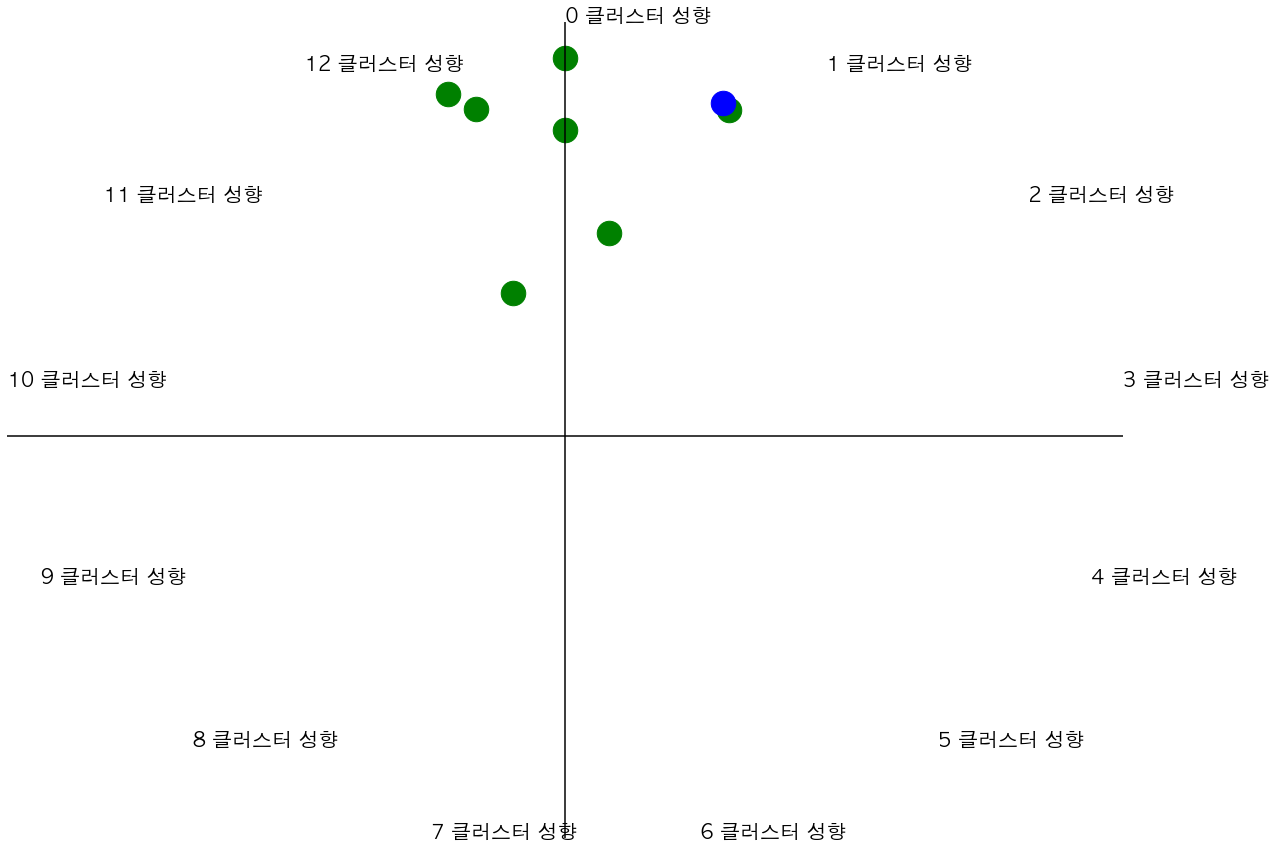

In [777]:
plt.figure(figsize=(20, 15))

for idx, pt in enumerate(search_box.values):
    b_id = search_box.index[idx]
    
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=600, color='b' if b_id == _my_box_id else 'g', label=ms.mail_box_radar.index[idx])
    
for idx, pt in enumerate(ms.max_coord):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    ms.max_coord[:,0].min(),
    ms.max_coord[:,0].max()
])
plt.yticks([
    ms.max_coord[:,1].min(),
    ms.max_coord[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

In [778]:
tracks = pd.DataFrame()
reco_ids = list()

for box in ms.mail_boxes:
    _id = box['_id']
    
    if str(_id) in search_box.index:
        _box_tracks = pd.DataFrame(box['tracks'])
        _box_tracks['box_id'] = str(_id)
        
        tracks = pd.concat([tracks,_box_tracks], ignore_index=True)
        reco_ids.append(str(_id))
        
tracks.rename({"track_id": "id"}, axis=1,inplace=True)
tracks.head()

,id,name,artists,artists_name,box_id
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,623f2516ff1c441a392ab392
1,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2516ff1c441a392ab392
2,6x7fux7bZEfnChKx3nhSZn,Me Gustas Tu,0qlWcS66ohOIi0M8JZwPft,GFRIEND,623f2516ff1c441a392ab392
3,6tRzqvMtnfDZY80WRh4csu,Tie a Cherry,0tzSBCPJZmHTdOA3ZV2mN3,CL,623f2516ff1c441a392ab392
4,1wzP4k1w8nprsfb6n8wpoz,Close to Me,2ujaWf015QoP7x1u20Yq5G,BLACKSWAN,623f2516ff1c441a392ab392


In [779]:
merge_features = pd.merge(tracks, norm_features, on="id")

merge_features.head()

,id,name,artists,artists_name,box_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,623f2516ff1c441a392ab392,0.245232,0.731424,0.727273,0.788933,0.564549,0.378857,0.000000,0.095386,0.434598,0.265127
1,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,623f2745ff1c441a392ab40b,0.245232,0.731424,0.727273,0.788933,0.564549,0.378857,0.000000,0.095386,0.434598,0.265127
2,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,623f2746ff1c441a392ab412,0.245232,0.731424,0.727273,0.788933,0.564549,0.378857,0.000000,0.095386,0.434598,0.265127
3,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,6241924d2aaa4bb999f6d5ca,0.245232,0.731424,0.727273,0.788933,0.564549,0.378857,0.000000,0.095386,0.434598,0.265127
4,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2516ff1c441a392ab392,0.686649,0.889710,0.818182,0.967201,0.264857,0.124570,0.000012,0.283056,0.698815,0.596867


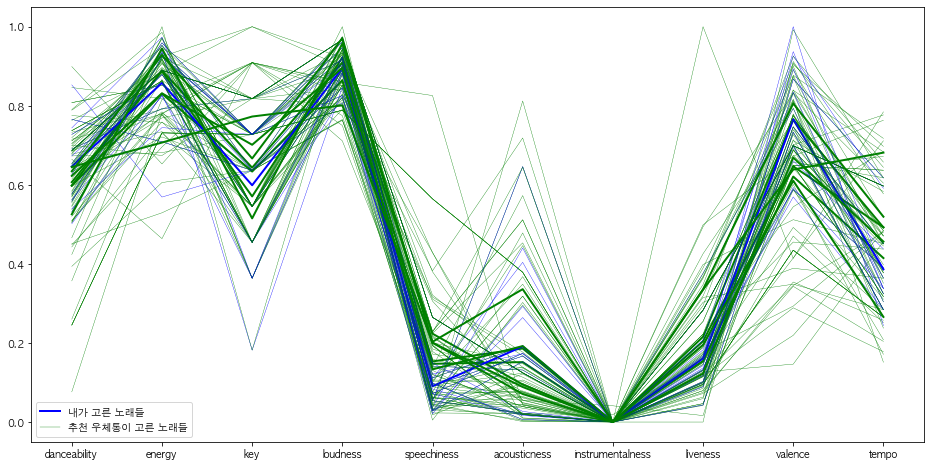

In [780]:
feature_columns = ['danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(16,8))

for box_id in reco_ids:
    _features = merge_features[
        merge_features['box_id'] == box_id
    ]
    
    plt.plot(_features[feature_columns].T.mean(axis=1), color='b' if box_id == _my_box_id else 'g',
            linewidth=2, label='내가 고른 노래들' if box_id == _my_box_id else '추천 우체통이 고른 노래들')
    plt.plot(_features[feature_columns].T, color='b' if box_id == _my_box_id else 'g',
            linewidth=0.35)


plt.xticks(feature_columns)
leg = plt.legend(['내가 고른 노래들', '추천 우체통이 고른 노래들'])

leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('g')

plt.show()

In [781]:
my_features = merge_features[
    merge_features['box_id'] == _my_box_id
]
my_mean = my_features[feature_columns].mean(axis=0).values
my_mean = np.expand_dims(my_mean, axis=0)

reco_features = my_features = merge_features[
    merge_features['box_id'] != _my_box_id
]
reco_features = reco_features[feature_columns].values

print("평균 노래 거리 차이 :",euc(my_mean,
   reco_features)[0].mean())

평균 노래 거리 차이 : 0.4314926816938763


In [782]:
rate_x = 100
rate_y = 100

if check_type != "idx":
    _my_box_id = ms.mail_box_points.loc[check_id].name
    user_centroid = ms.mail_box_points.loc[check_id].values
else:
    _my_box_id = ms.mail_box_points.iloc[check_idx].name
    user_centroid = ms.mail_box_points.iloc[check_idx].values

user_x, user_y = user_centroid

search_box = ms.mail_box_points[~(
    ((ms.mail_box_points['x'] < (user_x + rate_x)) & (ms.mail_box_points['x'] > (user_x - rate_x))) &
    ((ms.mail_box_points['y'] < (user_y + rate_y)) & (ms.mail_box_points['y'] > (user_y - rate_y)))
)]

if check_type != "idx":
    search_box = search_box.append(ms.mail_box_points.loc[check_id])
else:
    search_box = search_box.append(ms.mail_box_points.iloc[check_idx])

search_box.head()

,x,y
623f2515ff1c441a392ab38c,-66.312266,-74.851075
623f2515ff1c441a392ab38d,-96.102973,16.643184
623f2515ff1c441a392ab38e,-95.026788,-13.672940
623f2515ff1c441a392ab38f,-85.183176,26.317281
623f2515ff1c441a392ab390,-20.147117,-70.133670


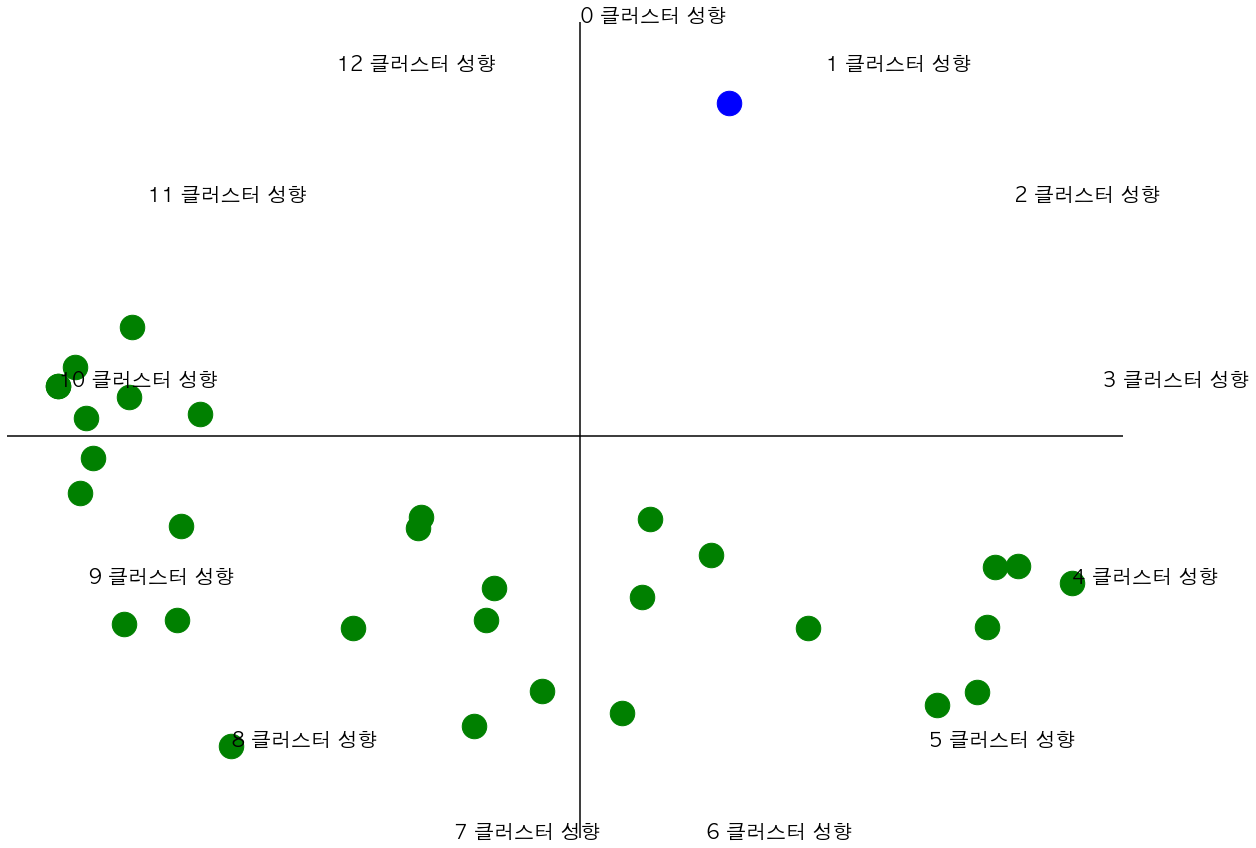

In [783]:
plt.figure(figsize=(20, 15))

for idx, pt in enumerate(search_box.values):
    b_id = search_box.index[idx]
    
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=600, color='b' if b_id == _my_box_id else 'g', label=ms.mail_box_radar.index[idx])
    
for idx, pt in enumerate(ms.max_coord):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    ms.max_coord[:,0].min(),
    ms.max_coord[:,0].max()
])
plt.yticks([
    ms.max_coord[:,1].min(),
    ms.max_coord[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

In [784]:
tracks = pd.DataFrame()
reco_ids = list()

for box in ms.mail_boxes:
    _id = box['_id']
    
    if str(_id) in search_box.index:
        _box_tracks = pd.DataFrame(box['tracks'])
        _box_tracks['box_id'] = str(_id)
        
        tracks = pd.concat([tracks,_box_tracks], ignore_index=True)
        reco_ids.append(str(_id))
        
tracks.rename({"track_id": "id"}, axis=1,inplace=True)
tracks.head()

,id,name,artists,artists_name,box_id
0,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38c
1,2yiISACbYnL2hApy1ffKKs,Misty - Remastered 2020,6C65D20ASusYqHGSIktfED,Erroll Garner,623f2515ff1c441a392ab38c
2,79chL6wRWGUCF5V5qKZtf0,Clair de Lune - Debussy,22pAlZRKZ8WyPTtf63Y5nV,Exam Study Classical Music Orchestra,623f2515ff1c441a392ab38c
3,58yFroDNbzHpYzvicaC0de,Peace Piece,4jXfFzeP66Zy67HM2mvIIF,Bill Evans,623f2515ff1c441a392ab38c
4,7KRaeLuGqHJNhU3V3Vw67Z,Dark Night of the Soul,7xaLfXBI5MSy3aNX7m4X3O,Philip Wesley,623f2515ff1c441a392ab38c


In [785]:
merge_features = pd.merge(tracks, norm_features, on="id")

merge_features.head()

,id,name,artists,artists_name,box_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38c,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
1,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38e,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
2,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2516ff1c441a392ab394,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
3,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2516ff1c441a392ab395,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
4,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2abbff1c441a392ab4c4,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436


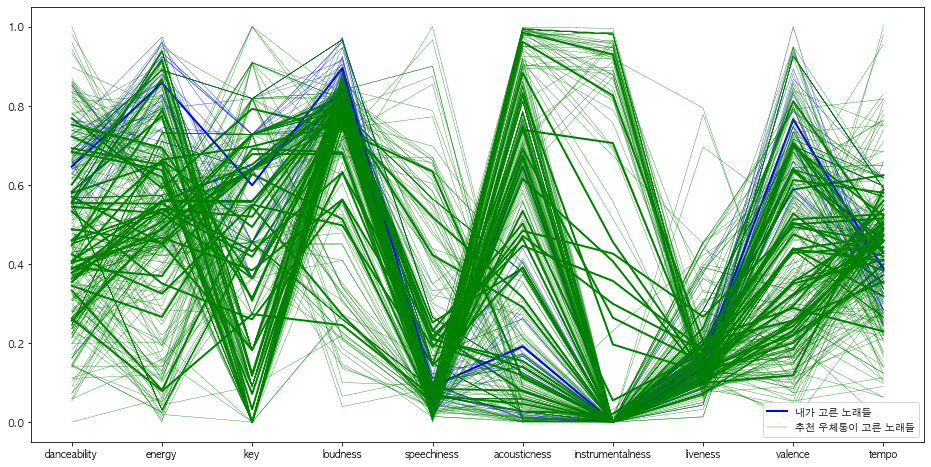

In [786]:
feature_columns = ['danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(16,8))

for box_id in reco_ids:
    _features = merge_features[
        merge_features['box_id'] == box_id
    ]
    
    plt.plot(_features[feature_columns].T.mean(axis=1), color='b' if box_id == _my_box_id else 'g',
            linewidth=2, label='내가 고른 노래들' if box_id == _my_box_id else '추천 우체통이 고른 노래들')
    plt.plot(_features[feature_columns].T, color='b' if box_id == _my_box_id else 'g',
            linewidth=0.35)


plt.xticks(feature_columns)
leg = plt.legend(['내가 고른 노래들', '추천 우체통이 고른 노래들'])

leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('g')

plt.show()

In [787]:
my_features = merge_features[
    merge_features['box_id'] == _my_box_id
]
my_mean = my_features[feature_columns].mean(axis=0).values
my_mean = np.expand_dims(my_mean, axis=0)

reco_features = merge_features[
    merge_features['box_id'] != _my_box_id
]
reco_features = reco_features[feature_columns].values

print("평균 노래 거리 차이 :",euc(my_mean,
   reco_features)[0].mean())

평균 노래 거리 차이 : 0.9522680422155927
